In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"  # 这个不能缺。 allow the program to continue to execute, but that may cause crashes or silently produce incorrect results.
from my_data import load_test_data
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import matplotlib.pyplot as plt
from image_class import t_model
from image_util import make_gradcam_heatmap,save_and_display_gradcam
# Part 5: Prediction Real cases

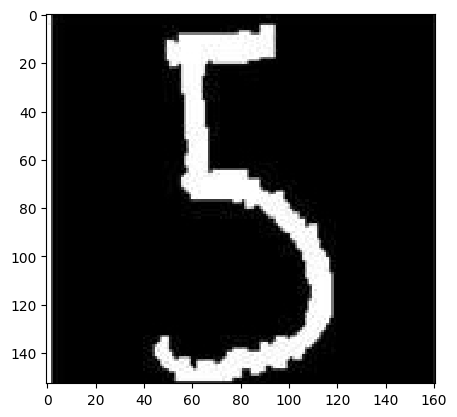

In [2]:
test_path = 'data/test_5_1.jpg'
x = Image.open(test_path)
plt.imshow(x)
plt.show()

In [3]:
model = keras.models.load_model('./image_raw_model.h5')
model.input


<tf.Tensor 'model_input:0' shape=(None, 71, 71, 3) dtype=float32>

In [4]:
dim = (71,71)
test_img = load_test_data(test_path,dim)
test_IMG = np.expand_dims(test_img,axis=0) # 一个图片因此加dim
test_IMG=tf.cast(test_IMG,tf.float32)
result = model.predict(test_IMG)
predict_digit, prediction_prob = result.argmax(), result.max()
print('prediction is {0} with prob {1}'.format(predict_digit, prediction_prob))

prediction is 5 with prob 0.9996455907821655


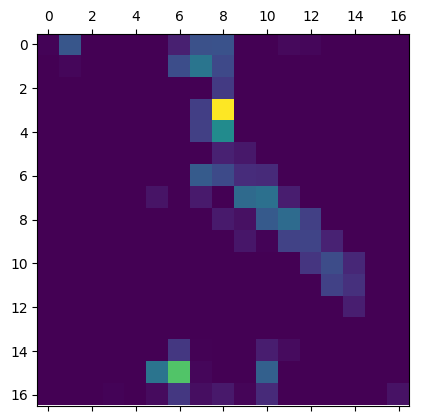

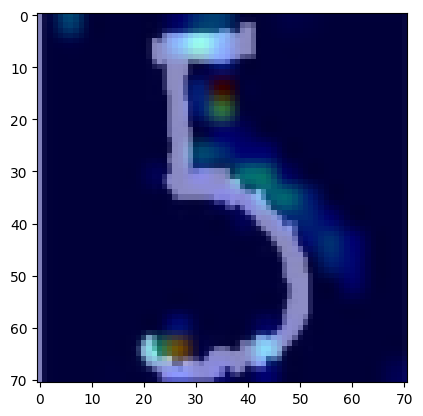

In [5]:
heatmap = make_gradcam_heatmap(test_IMG, model, 'conv3')
plt.matshow(heatmap)
plt.show()

save_and_display_gradcam(test_IMG, heatmap,dim, alpha=0.8,cam_path='data/cam/%s_cam.jpg' % predict_digit)
